In [199]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import numpy as np

In [223]:
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = [ 'red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

In [224]:
#Print number of countries by landmass, or continent
count = df.landmass.value_counts()

#Create a new dataframe with only flags from Europe and Oceania
df_36 = df.drop(df[(df.landmass != 3) & (df.landmass != 6)].index)
#print(df.head())

#Print the average vales of the predictors for Europe and Oceania
avg = df_36.groupby('landmass')[var].mean()
#print(avg)

In [225]:
#Create labels for only Europe and Oceania
labels = (df["landmass"].isin([3,6]))*1
#print(labels)

#Print the variable types for the predictors
#print(df_36[var].dtypes)

#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])
#print(data.head())

In [226]:
#Split data into a train and test set
X = data
y = df_36.landmass
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [244]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for i in depths:
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(x_train, y_train)
    acc_depth.append(dtree.score(x_test, y_test))

acc_depth

[0.6818181818181818,
 0.8181818181818182,
 0.6363636363636364,
 0.6363636363636364,
 0.6818181818181818,
 0.6363636363636364,
 0.5454545454545454,
 0.5,
 0.5454545454545454,
 0.5909090909090909,
 0.5,
 0.5454545454545454,
 0.5909090909090909,
 0.5454545454545454,
 0.5909090909090909,
 0.6363636363636364,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909,
 0.5909090909090909]

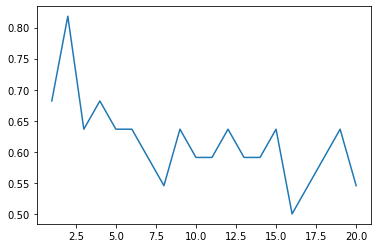

In [228]:
#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.show()

In [229]:
#Find the largest accuracy and the depth this occurs
acc = max(acc_depth)
print(acc)

0.8181818181818182


In [253]:
#Refit decision tree model with the highest accuracy and plot the decision tree
X = data
y = df_36.landmass
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
dtree = DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train, y_train)
print(dtree.score(x_test, y_test))

0.8181818181818182


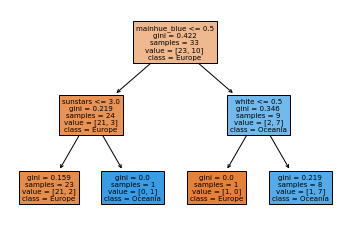

0.8181818181818182

In [254]:
tree.plot_tree(dtree, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], filled=True)
plt.show()
dtree.score(x_test, y_test)

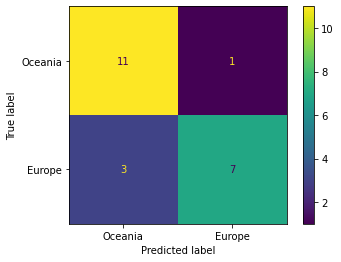

In [232]:
plot_confusion_matrix(dtree, x_test, y_test, display_labels={'Europe', 'Oceania'})

<AxesSubplot:xlabel='tree'>

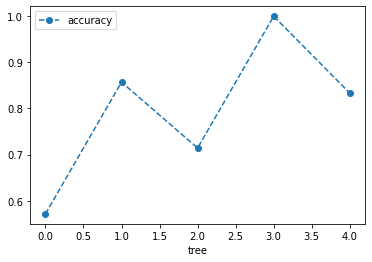

In [233]:
scores = cross_val_score(dtree, x_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [234]:
#Create a new list for the accuracy values of a pruned decision tree.  
#Loop through the values of ccp and append the scores to the list
path = dtree.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

clfs = []
for ccp_alpha in alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

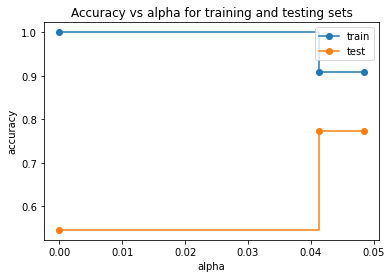

In [235]:
#Plot the accuracy vs ccp_alpha
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

DecisionTreeClassifier(ccp_alpha=0.041246, random_state=1)

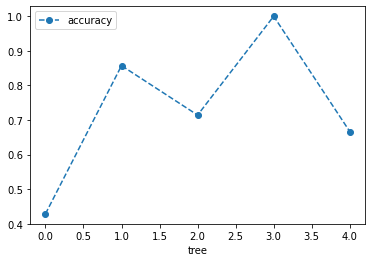

In [236]:
#Find the largest accuracy and the ccp value this occurs
clf = DecisionTreeClassifier(random_state=1, ccp_alpha=0.041246)
scores = cross_val_score(clf, x_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')
clf.fit(x_train, y_train)

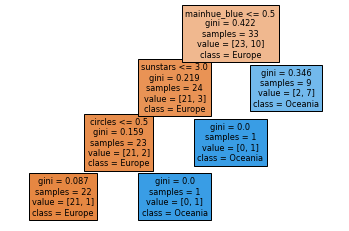

0.7727272727272727

In [255]:
tree.plot_tree(clf, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], filled=True)
plt.show()
clf.score(x_test, y_test)

<AxesSubplot:xlabel='alpha'>

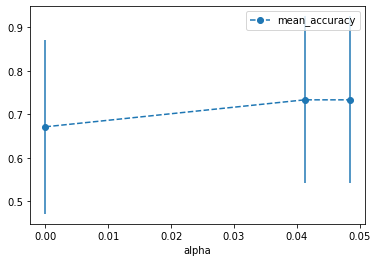

In [256]:
#Cross validation of the alpha selected
alpha_values = []
for alpha in alphas:
    clf2 = DecisionTreeClassifier(random_state=1, ccp_alpha=alpha)
    scores = cross_val_score(clf2, x_train, y_train, cv=5)
    alpha_values.append([alpha, np.mean(scores), np.std(scores)])
    
results = pd.DataFrame(alpha_values, columns=['alpha', 'mean_accuracy', 'std'])

results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [239]:
results[(results['alpha'] > 0.03) & (results['alpha'] < 0.05)]

,alpha,mean_accuracy,std
1,0.041246,0.733333,0.191899
2,0.048419,0.733333,0.191899


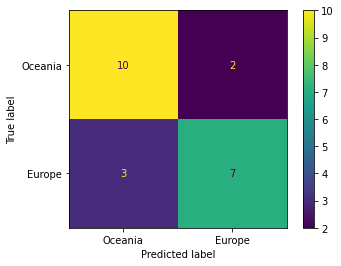

In [240]:
plot_confusion_matrix(clf, x_test, y_test, display_labels={'Europe', 'Oceania'})

In [241]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dt = DecisionTreeClassifier(max_depth=2, ccp_alpha=0.041246, random_state=1)
dt.fit(x_train, y_train)
dtree.score(x_test, y_test)

0.8181818181818182

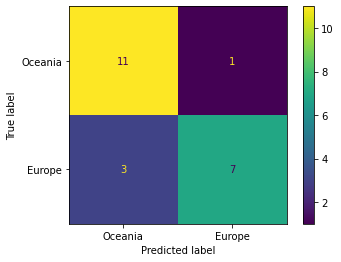

In [242]:
plot_confusion_matrix(dt, x_test, y_test, display_labels={'Europe', 'Oceania'})

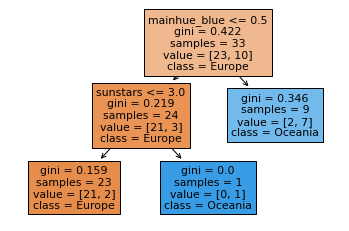

0.8181818181818182

In [243]:
#Plot the final decision tree
tree.plot_tree(dt, feature_names = x_train.columns, class_names = ['Europe', 'Oceania'], filled=True)
plt.show()
dt.score(x_test, y_test)